# Analyse Gromacs mdp files

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Update font size for graphics
plt.rcParams.update({"font.size": 20})

In [6]:
df = pd.read_csv("../data/gromacs_mdp_files_info.tsv", sep="\t")

In [7]:
df

,dataset_origin,dataset_id,dt,nsteps,temperature,barostat,thermostat,filename
0,osf,2ah8r,0.001,2500000.0,303.15,NaN,berendsen,step6.2_equilibration.mdp
1,osf,2ah8r,0.002,5000000.0,303.15,berendsen,berendsen,step6.4_equilibration.mdp
2,osf,2ah8r,0.001,2500000.0,303.15,berendsen,berendsen,step6.3_equilibration.mdp
3,osf,2ah8r,0.002,5000000.0,303.15,berendsen,berendsen,step6.6_equilibration.mdp
4,osf,2ah8r,0.002,100000000.0,303.15,Parrinello-Rahman,Nose-Hoover,step7_production.mdp
...,...,...,...,...,...,...,...,...
5449,figshare,7010927,0.002,50000.0,310.00,berendsen,V-rescale,md4.out.mdp
5450,figshare,11569452,NaN,50000.0,NaN,NaN,NaN,md_files/c-cage/min.mdp
5451,figshare,11569452,0.001,10000000.0,298.15,Parrinello-Rahman,V-rescale,md_files/c-cage/grompp_npt_md.mdp
5452,figshare,11569452,0.001,100000.0,298.15,no,V-rescale,md_files/c-cage/run_nvt.mdp


## Temperature

count    5148.000000
mean      306.408012
std        32.336026
min         0.000000
25%       300.000000
50%       310.000000
75%       310.000000
max      1500.000000
Name: temperature, dtype: float64


(0.0, 30.0)

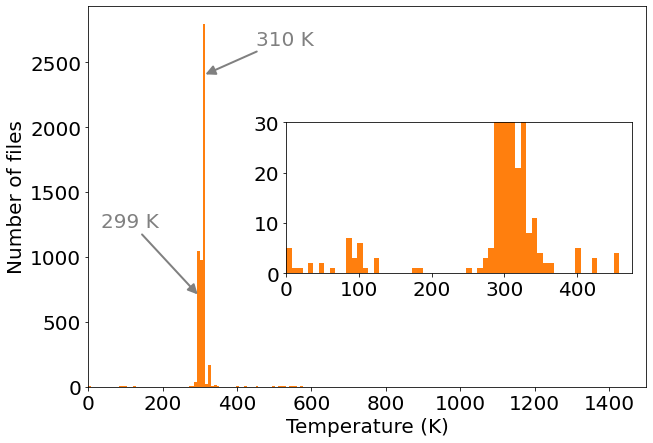

In [127]:
print(df["temperature"].describe())

bins=200

fig, ax1 = plt.subplots(figsize=(10,7))
ax1.hist(df["temperature"], 
         bins=bins,
         color="tab:orange")
ax1.set_xlabel("Temperature (K)")
ax1.set_ylabel("Number of files")
ax1.set_xlim(0, max(df["temperature"]))
ax1.annotate("310 K", xy=(310, 2400), xytext=(450, 2750), color="gray",
             arrowprops={"arrowstyle":"-|>", "lw":2, "color":"gray", "connectionstyle":"arc3"}, 
             horizontalalignment="left", verticalalignment="top")
ax1.annotate("299 K", xy=(298, 700), xytext=(190, 1200), color="gray",
             arrowprops={"arrowstyle":"-|>", "lw":2, "color":"gray"}, 
             horizontalalignment="right", verticalalignment="bottom")

ax2 = fig.add_axes([0.40, 0.35, 0.48, 0.3])
ax2.hist(df["temperature"], 
         bins=bins,
         color="tab:orange")
ax2.set_xlim(0, 475)
ax2.set_xticks(range(0, 450, 100))
ax2.set_ylim(0, 30)

#plt.savefig("mdp_temperature_distribution.png", dpi=300, bbox_inches="tight")
#plt.savefig("mdp_temperature_distribution.svg", bbox_inches="tight")

In [51]:
df.query("temperature < 50")

,dataset_origin,dataset_id,dt,nsteps,temperature,barostat,thermostat,filename
4452,zenodo,6056060,0.0020,10000.0,30.0,Parrinello-Rahman,v-rescale,masterclass/mdout.mdp
4453,zenodo,6056060,0.0020,10000.0,30.0,Parrinello-Rahman,v-rescale,masterclass/npt.mdp
4692,figshare,3408676,0.0010,1000000.0,15.0,NaN,NaN,Validation/WaterHexamer/gmx/run.mdp
4710,figshare,7370684,0.0020,5000.0,0.0,no,v-rescale,md_files/2-MD-runs/mdp/1_grompp_minimisation.mdp
5157,figshare,10269416,0.0005,10000000.0,10.0,Parrinello-Rahman,nose-hoover,input_files/MD/production.mdp
5158,figshare,10269416,0.0005,60000000.0,3.0,Parrinello-Rahman,nose-hoover,input_files/MD/production_REMD.mdp
5241,figshare,8846045,0.0300,10000.0,0.0,berendsen,Berendsen,Tutorial/mdp/2_npt.mdp
5243,figshare,8846045,0.0300,1000000.0,0.0,berendsen,Berendsen,Tutorial/mdp/3_run.mdp
5244,figshare,8846045,0.0300,5000.0,0.0,no,Berendsen,Tutorial/mdp/2_nvt.mdp


Dataset [figshare/10269416](https://figshare.com/articles/dataset/Adding_Anisotropy_to_the_Standard_Quasi-Harmonic_Approximation_Still_Fails_in_Several_Ways_to_Capture_Organic_Crystal_Thermodynamics/10269416) at 10 K:

> Adding Anisotropy to the Standard Quasi-Harmonic Approximation Still Fails in Several Ways to Capture Organic Crystal Thermodynamics

In [52]:
df.query("temperature > 1000")

,dataset_origin,dataset_id,dt,nsteps,temperature,barostat,thermostat,filename
4761,figshare,2267512,0.001,6000000.0,1500.0,no,V-rescale,6P_crystal_reproduction_files/reproduction_fil...


Dataset [figshare/2267512](https://figshare.com/articles/dataset/Growth_and_Characterization_of_Molecular_Crystals_of_i_para_i_Sexiphenyl_by_All_Atom_Computer_Simulations/2267512) at 1500 K:

> Growth and Characterization of Molecular Crystals of para-Sexiphenyl by All-Atom Computer Simulations

## Simulation time

(0.0, 10000.0)

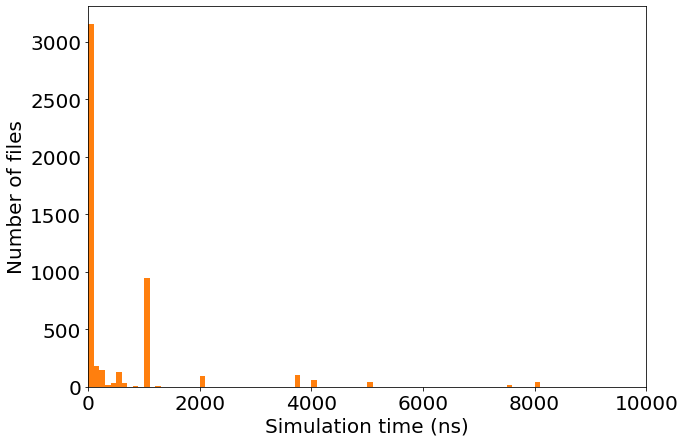

In [149]:
# dt is in ps
# https://manual.gromacs.org/documentation/current/user-guide/mdp-options.html#mdp-dt
df["time"] = df["dt"] * df["nsteps"] / 1000
# in ns
# 1 µs = 1 000 ns

fig, ax = plt.subplots(figsize=(10,7))
ax.hist(df["time"], 
         bins=1_000,
         color="tab:orange")
ax.set_xlabel("Simulation time (ns)")
ax.set_ylabel("Number of files")
ax.set_xlim(0, 10_000)

In [152]:
# Simulations above 50 µs
df.query("time > 50_000")

,dataset_origin,dataset_id,dt,nsteps,temperature,barostat,thermostat,filename,time
202,osf,a43z2,0.030,2.500000e+09,310.0,parrinello-rahman,v-rescale,hGBP1 dimer Martini-MD/cg_md_dimer_traj.mdp,75000.0
359,zenodo,4451274,0.002,5.000000e+10,310.0,Berendsen,No,SARS-COV2_spike_simulations_Dform_Gform/md.mdp,100000.0
3204,zenodo,846428,0.020,5.000000e+09,315.0,Parrinello-rahman,v-rescale,md.mdp,100000.0
